## Recommendation Engine

Recommendation Engine helps to get the similar items to users or items to similar users to recommend. This is based on collaborative filtering. 

- User User Filtering 
- Item Item Filtering

### Libraries

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import math
from sklearn.metrics.pairwise import cosine_similarity
import tkinter as tk
from tkinter import StringVar
from tkinter import messagebox

### Users data

In [2]:
dataUsers = pd.read_csv('BX-Users.csv', error_bad_lines=False, encoding = 'ISO-8859-1', delimiter=';')

In [3]:
dataUsers.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
dataUsers.shape

(278858, 3)

### Books data

In [5]:
dataBooks = pd.read_csv('BX-Books.csv', error_bad_lines=False, encoding = 'ISO-8859-1', delimiter=';')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/Users/akshayadlakha/opt/anaconda3/lib/python3.7/site-packages/IPython/cor

In [6]:
dataBooks.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Ratings 

In [7]:
dataRatings = pd.read_csv('BX-Book-Ratings.csv', error_bad_lines=False, encoding = 'ISO-8859-1', delimiter=';')

In [8]:
dataRatings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
### Combining all the data into one dataframe

In [10]:
data = pd.merge(dataRatings, dataUsers, on='User-ID', how='inner')

In [11]:
data.head()

,User-ID,ISBN,Book-Rating,Location,Age
0,276725,034545104X,0,"tyler, texas, usa",NaN
1,276726,0155061224,5,"seattle, washington, usa",NaN
2,276727,0446520802,0,"h, new south wales, australia",16.0
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,"rijeka, n/a, croatia",16.0


In [12]:
data = pd.merge(data, dataBooks, on='ISBN', how='inner')

In [13]:
data.shape

(1031136, 12)

In [14]:
data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


### EDA and Data Cleaning

In [15]:
# unique users in data
len(list(data['User-ID'].unique()))

92106

In [16]:
# no. of books in data
len(list(data['ISBN'].unique()))

270151

In [18]:
# Count of each books that has been rated by users.
data['Book-Title'].value_counts()

Wild Animus                                   2502
The Lovely Bones: A Novel                     1295
The Da Vinci Code                              898
A Painted House                                838
The Nanny Diaries: A Novel                     828
                                              ... 
Lord Brandsley's Bride (Coventry Romances)       1
Presenting Mark Russell                          1
The puppet master: A novel                       1
Sunshine for the Lds Soul                        1
Animalia (Picture Puffins)                       1
Name: Book-Title, Length: 241071, dtype: int64

In [19]:
# checking null/missing values in data
data.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Location                    0
Age                    277835
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
dtype: int64

In [20]:
# dropping age, Image-URL-L, Image-URL-M and Image-URL-S
data.drop(["Age",'Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)

In [21]:
data.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Location               0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [22]:
data.dropna(inplace=True)

In [23]:
data.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Location               0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [24]:
data.shape

(1031133, 8)

In [25]:
data.head()

,User-ID,ISBN,Book-Rating,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,"tyler, texas, usa",Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,"cincinnati, ohio, usa",Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,"strafford, missouri, usa",Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,"st. charles county, missouri, usa",Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,"beaverton, oregon, usa",Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [26]:
data['Year-Of-Publication'].unique()

array([2002, '2001', 1996, '1999', 1998, 2001, 1994, 1995, 2003, 1997,
       '1995', 1999, '1998', '2024', 1992, '1983', '2002', '1996', '2000',
       0, '1989', '2003', '1991', 1993, '1994', 1976, '1993', 1991, '0',
       2000, 1983, 1990, 1982, 1988, 1981, '1988', 1989, 1986, '1987',
       '1992', 1987, '1980', '1990', '1997', 2004, 1984, '1982', '1985',
       1985, 1979, '2004', '1984', 1974, '1979', 1977, 1965, 1972, '1978',
       '1986', '1981', 1962, '1977', 1957, 1958, 1960, 1963, 1969, '1974',
       1978, 1970, '1972', 1980, '1975', 1959, '1960', 1968, '1976',
       '1970', '1971', 1975, 1973, '1950', '1969', '1962', 1971, 1964,
       1955, 1953, 1966, '1965', '1963', '1973', 1930, '1964', 1961,
       '1952', 1940, '1968', 1954, '1967', '1911', 1952, 1946, 1941, 1920,
       1967, 1956, 1942, 1951, 1948, '1959', 1950, 2005, 1943, 1937, 1923,
       1945, 1947, 1936, 1925, '1966', '1958', 1927, 2030, 2011, 2020,
       1939, 1926, 1938, '1961', 1911, 1904, 1949, 1932, 

There are some invalid values in Year-Of-Publication, Publisher names are added in Year-of-Publication by mistake

In [27]:
data.loc[data['Year-Of-Publication'] == 'DK Publishing Inc',:]

,User-ID,ISBN,Book-Rating,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
911154,130571,0789466953,0,"summerville, south carolina, usa","DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...
949657,169663,078946697X,0,"towson, maryland, usa","DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
949658,227771,078946697X,7,"savion, n/a, israel","DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...


In [28]:
data.loc[data['ISBN'] == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"
data.loc[data['ISBN'] == '0789466953','Book-Author'] = "James Buckley"
data.loc[data['ISBN'] == '0789466953','Year-Of-Publication'] = 2000
data.loc[data['ISBN'] == '0789466953','Publisher'] = "DK Publishing Inc"

In [29]:
data.loc[data['ISBN'] == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"
data.loc[data['ISBN'] == '078946697X','Book-Author'] = "Michael Teitelbaum"
data.loc[data['ISBN'] == '078946697X','Year-Of-Publication'] = 2000
data.loc[data['ISBN'] == '078946697X','Publisher'] = "DK Publishing Inc"

In [30]:
data.loc[(data['ISBN'] == '0789466953') | (data['ISBN'] == '078946697X'),:]

,User-ID,ISBN,Book-Rating,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
911154,130571,0789466953,0,"summerville, south carolina, usa","DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc
949657,169663,078946697X,0,"towson, maryland, usa","DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc
949658,227771,078946697X,7,"savion, n/a, israel","DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc


In [31]:
data.loc[data['Year-Of-Publication'] == 'Gallimard',:]

,User-ID,ISBN,Book-Rating,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
918145,137190,2070426769,0,"rennes, bretagne, france","Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [32]:
data.loc[data['ISBN'] == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"
data.loc[data['ISBN'] == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
data.loc[data['ISBN'] == '2070426769','Year-Of-Publication'] = 2003
data.loc[data['ISBN'] == '2070426769','Publisher'] = "Gallimard"

In [33]:
data.loc[data['ISBN'] == '2070426769',:]

,User-ID,ISBN,Book-Rating,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
918145,137190,2070426769,0,"rennes, bretagne, france","Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard


In [34]:
data.dtypes

User-ID                 int64
ISBN                   object
Book-Rating             int64
Location               object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
dtype: object

In [35]:
data['Year-Of-Publication']=pd.to_numeric(data['Year-Of-Publication'], errors='coerce')

In [36]:
data['Year-Of-Publication'].unique()

array([2002, 2001, 1996, 1999, 1998, 1994, 1995, 2003, 1997, 2024, 1992,
       1983, 2000,    0, 1989, 1991, 1993, 1976, 1990, 1982, 1988, 1981,
       1986, 1987, 1980, 2004, 1984, 1985, 1979, 1974, 1977, 1965, 1972,
       1978, 1962, 1957, 1958, 1960, 1963, 1969, 1970, 1975, 1959, 1968,
       1971, 1973, 1950, 1964, 1955, 1953, 1966, 1930, 1961, 1952, 1940,
       1954, 1967, 1911, 1946, 1941, 1920, 1956, 1942, 1951, 1948, 2005,
       1943, 1937, 1923, 1945, 1947, 1936, 1925, 1927, 2030, 2011, 2020,
       1939, 1926, 1938, 1904, 1949, 1932, 1929, 1944, 1933, 1922, 1897,
       2050, 1902, 1924, 1921, 1900, 2038, 2010, 1928, 2006, 1901, 2026,
       2021, 1931, 1378, 1908, 1909, 2012, 2008, 1935, 1376, 2037, 1906,
       1806, 1917, 1919, 1914, 1934, 1910])

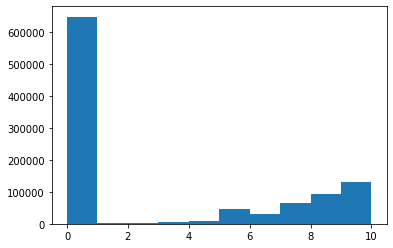

In [37]:
data["Book-Rating"].value_counts()
plt.hist(data['Book-Rating'], bins=10)
plt.show()

In [38]:
# average book rating 
C = data['Book-Rating'].mean()
print(math.ceil(C))

3


In [39]:
data["Book-Rating"].replace(0.0,None,inplace=True)
data[data["Book-Rating"]==0]

,User-ID,ISBN,Book-Rating,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,"tyler, texas, usa",Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [40]:
data["Book-Rating"].iloc[0]=math.ceil(C)

/Users/akshayadlakha/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


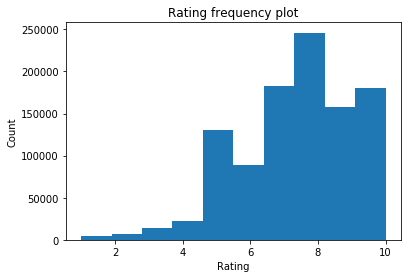

In [41]:
plt.hist(data['Book-Rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating frequency plot')
plt.show()

In [42]:
data["Book-Rating"].value_counts()

8     245973
7     182413
10    179914
9     157200
5     130125
6      88262
4      21760
3      14367
2       6828
1       4291
Name: Book-Rating, dtype: int64

### Data Preparation

In [43]:
data.groupby(["ISBN","Book-Title","Book-Author"])["Book-Rating"].mean().head()

ISBN        Book-Title                                                      Book-Author                  
0000913154  The Way Things Work: An Illustrated Encyclopedia of Technology  C. van Amerongen (translator)     8.0
0001010565  Mog's Christmas                                                 Judith Kerr                      10.0
0001046438  Liar                                                            Stephen Fry                       9.0
0001046713  Twopence to Cross the Mersey                                    Helen Forrester                   7.0
000104687X  T.S. Eliot Reading \The Wasteland\" and Other Poems"            T.S. Eliot                        6.0
Name: Book-Rating, dtype: float64

In [44]:
data.groupby(["ISBN","Book-Title","Book-Author"])["Book-Rating"].mean().sort_values(ascending=False).head()

ISBN        Book-Title                                                                  Book-Author          
0717264718  102 Dalmatians                                                              Disney                   10.0
1895421004  Keepers of the Secret (Salamanca No. 1)                                     Michele Lynn Boudreau    10.0
0425186237  From the Soul: Stories of Great Black Parents &amp; the Lives They Gave Us  Phyllis Y. Harris        10.0
0912677139  Soft words, hard words: A common-sense guide to creative documentation      Lucia McKay              10.0
0312959796  Dreams of You (Dreams of You)                                               Tina Wainscott           10.0
Name: Book-Rating, dtype: float64

In [45]:
data.groupby(["ISBN","Book-Title","Book-Author"])["Book-Rating"].count().sort_values(ascending=False).head()

ISBN        Book-Title                                       Book-Author  
0971880107  Wild Animus                                      Rich Shapero     2502
0316666343  The Lovely Bones: A Novel                        Alice Sebold     1295
0385504209  The Da Vinci Code                                Dan Brown         883
0060928336  Divine Secrets of the Ya-Ya Sisterhood: A Novel  Rebecca Wells     732
0312195516  The Red Tent (Bestselling Backlist)              Anita Diamant     723
Name: Book-Rating, dtype: int64

In [46]:
ratingsmeancount = pd.DataFrame(data.groupby(["ISBN","Book-Title","Book-Author"])["Book-Rating"].mean())

In [47]:
ratingsmeancount['rating_counts'] = pd.DataFrame(data.groupby(["ISBN","Book-Title","Book-Author"])["Book-Rating"].count())

In [48]:
ratingsmeancount.head()

,,,Book-Rating,rating_counts
ISBN,Book-Title,Book-Author,,
0000913154,The Way Things Work: An Illustrated Encyclopedia of Technology,C. van Amerongen (translator),8.0,1
0001010565,Mog's Christmas,Judith Kerr,10.0,2
0001046438,Liar,Stephen Fry,9.0,1
0001046713,Twopence to Cross the Mersey,Helen Forrester,7.0,1
000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other Poems""",T.S. Eliot,6.0,1


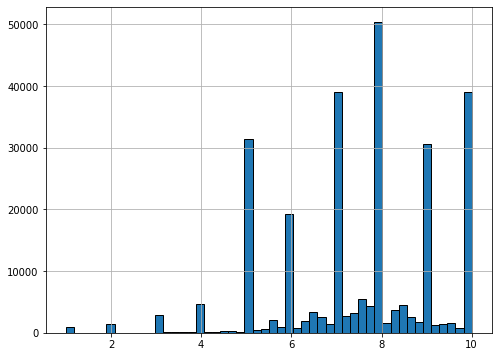

In [49]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratingsmeancount['Book-Rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

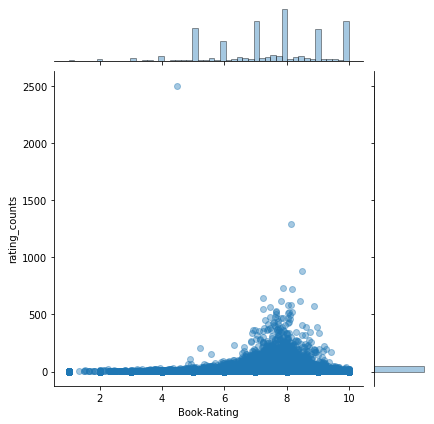

In [50]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Book-Rating', y='rating_counts', data=ratingsmeancount, alpha=0.4)

In [51]:
ratingSum=pd.DataFrame(data.groupby(["ISBN","Book-Title"])["Book-Rating"].sum().sort_values(ascending=False).head(10))

In [52]:
# popular books
ratingSum

,,Book-Rating
ISBN,Book-Title,
0971880107,Wild Animus,11244
0316666343,The Lovely Bones: A Novel,10539
0385504209,The Da Vinci Code,7489
0312195516,The Red Tent (Bestselling Backlist),5920
0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,5769
0142001740,The Secret Life of Bees,5187
059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),5073
067976402X,Snow Falling on Cedars,4802
0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),4771


In [53]:
topUser=data["User-ID"].value_counts().sort_values(ascending=False).head(500).index
topUser

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
             91931,  12982,  10819,  96448, 164465, 191187, 131837, 135458,
               254,  85701],
           dtype='int64', length=500)

In [54]:
userData=data[data["User-ID"].isin(topUser)]
userData.head()

,User-ID,ISBN,Book-Rating,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
2,6543,034545104X,5,"strafford, missouri, usa",Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
5,23768,034545104X,9,"st. louis, missouri, usa",Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
7,28523,034545104X,9,"springfield, missouri, usa",Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
15,77940,034545104X,8,"melaka, melaka, malaysia",Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
16,81977,034545104X,8,"minneapolis, minnesota, usa",Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [55]:
userCount=userData["User-ID"].value_counts()

In [56]:
userCount

11676     11144
198711     6456
153662     5814
98391      5777
35859      5646
          ...  
191187      302
135458      301
131837      301
85701       300
254         300
Name: User-ID, Length: 500, dtype: int64

In [57]:
users=userData[userData["User-ID"].isin(userCount[userCount>=1000].index)]
fUsers=users.groupby("Book-Title")["Book-Rating"].sum().reset_index()
fUsers

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,7
1,Always Have Popsicles,9
2,Apple Magic (The Collector's series),10
3,Beyond IBM: Leadership Marketing and Finance ...,10
4,Dark Justice,10
...,...,...
95535,Â¿Eres tu mi mamÃ¡?/Are You My Mother?,9
95536,"Â¿QuÃ© me quieres, amor?",6
95537,Ã?Â?ber das Fernsehen.,8
95538,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,7


In [58]:
books=fUsers[fUsers["Book-Rating"]>100]
books

,Book-Title,Book-Rating
252,16 Lighthouse Road,131
273,1984,138
288,1st to Die: A Novel,295
335,2010: Odyssey Two,143
340,204 Rosewood Lane,159
...,...,...
95019,You Belong To Me,199
95184,Young Wives,107
95369,Zen and the Art of Motorcycle Maintenance: An ...,116
95442,Zoya,177


In [59]:
datamat=users[users["Book-Title"].isin(books["Book-Title"])]
datamat

,User-ID,ISBN,Book-Rating,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
63,278418,0446520802,5,"omaha, nebraska, usa",The Notebook,Nicholas Sparks,1996,Warner Books
69,11676,0446520802,10,"n/a, n/a, n/a",The Notebook,Nicholas Sparks,1996,Warner Books
74,23768,0446520802,6,"st. louis, missouri, usa",The Notebook,Nicholas Sparks,1996,Warner Books
100,102967,0446520802,9,"olympia, washington, usa",The Notebook,Nicholas Sparks,1996,Warner Books
124,158295,0446520802,8,"cleveland, ohio, usa",The Notebook,Nicholas Sparks,1996,Warner Books
...,...,...,...,...,...,...,...,...
1027923,269566,0670809381,6,"seattle, washington, usa",Echoes,Maeve Binchy,1986,Penguin USA
1028777,271284,0440910927,5,"alexandria, virginia, usa",The Rainmaker,John Grisham,1995,Island
1029947,274061,1551663147,10,"gahanna/columbus, ohio, usa",Fever,Elizabeth Lowell,1997,Mira
1030824,275970,0865714215,8,"pittsburgh, pennsylvania, usa",Stormy Weather,Guy Dauncey,2001,New Society Publishers


## User Filtering

In [60]:
userMatrix=datamat.pivot(index="User-ID",columns="ISBN",values="Book-Rating")
userMatrix.fillna(0,inplace=True)
userMatrix.head()

ISBN,0001047973,0006170056,000648302X,002026478X,0020442203,002542730X,002542730x,0060008024,0060008032,0060009241,...,1932234039,2070512541,2253170828,2253172324,3257208626,5552034341,843761449X,B00001IVC7,B00007CWQC,B0000T6KHI
User-ID,,,,,,,,,,,,,,,,,,,,,
11601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11676,0.0,0.0,8.0,0.0,0.0,6.0,0.0,8.0,8.0,8.0,...,0.0,7.0,5.0,7.0,8.0,0.0,8.0,0.0,0.0,0.0
12538,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16634,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16795,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,8.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Computing Cosine Similarity

In [61]:
cossimUsers = cosine_similarity(userMatrix)
np.fill_diagonal(cossimUsers,0) 
cosUser=pd.DataFrame(cossimUsers,index=userMatrix.index)
cosUser.columns=userMatrix.index

### Finding books for user

In [62]:
def book_recommender(userid,n):
    if (userid not in cosUser.index.values):
        return ('User must be from interaction matrix.' + '\n' + 'Please refer this list: ' + np.array_str(cosUser.index.values))
    else:
        arr=np.array(cosUser[userid].sort_values(ascending=False).head(5).index)
        rlist=[]
        for i in arr:
            rlist.append(datamat[datamat["User-ID"]==i][["Book-Title","Book-Rating"]].sort_values(by="Book-Rating",ascending=False))    
        books = pd.Series(rlist[0].append([rlist[1],rlist[2],rlist[3],rlist[4]]).groupby("Book-Title")["Book-Rating"].mean().sort_values(ascending=False).index).head(n).to_numpy()
        return books

In [63]:
print(book_recommender(11601,5))

['The Celestine Prophecy (Celestine Prophecy)'
 'Taltos: Lives of the Mayfair Witches'
 'Stupid White Men ...and Other Sorry Excuses for the State of the Nation!'
 'The Passion' 'The Outsiders']


### Item Filtering

In [64]:
matrixItem=datamat.pivot(index="ISBN",columns="User-ID",values="Book-Rating")
matrixItem.fillna(0,inplace=True)
matrixItem.head()

User-ID,11601,11676,12538,16634,16795,23768,23902,26544,31315,31556,...,254465,257204,265115,266226,269566,271284,274061,274308,275970,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0001047973,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0006170056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000648302X,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002026478X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
0020442203,0.0,0.0,0.0,9.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,9.0


In [65]:
cossimItem = cosine_similarity(matrixItem)
np.fill_diagonal(cossimItem,0) 
cosItem=pd.DataFrame(cossimItem,index=matrixItem.index)
cosItem.columns=matrixItem.index

In [66]:
def item_recommender(bookname,rating):
    if (bookname not in cosItem.index.values):
        return ('Book no must be from interaction matrix.' + '\n' + 'Please refer this list: ' +np.array2string(cosItem.index.values, precision=2, separator=',', max_line_width=15) )
    else:
        similarbooks= cosItem[bookname]*(rating-3)
        similarbooks= similarbooks.sort_values(ascending=False)
        return similarbooks.head(10).index.to_numpy()

### UI for system

In [67]:
import tkinter as tk
root= tk.Tk()
root.title("Recommendation Systems")
root.geometry("800x650")
heading = tk.Label(root,text="Intorduction to Machine Learning - CSE574",font=(None,24))
heading.pack()
subheading = tk.Label(root,text="Recommendation Engine",font=(None,18))
subheading.pack()
def change(*args):
    if var.get()==OptionList[0]:
        clearFrame()
        label = tk.Label(frame,text="UserID")
        entry = tk.Entry(frame)
        label.pack()
        entry.pack()
        label1 = tk.Label(frame,text="No of books")
        entry1 = tk.Entry(frame)
        label1.pack()
        entry1.pack()
        result = StringVar()
        result.set('')
        def searchBook(userid,value):
            try:
                userid = int(userid)
                value = int(value)
                if value <= 0 or value > 10:
                        raise ValueError
                books = book_recommender(userid,value)
                if type(books) == str:
                    result.set(books)
                else:
                    n = len(books)
                    result1 = 'Books Recommended:' + '\n\n'
                    for i in range(n):
                        result1 = result1 + 'Book' + str(i+1)+': ' + books[i]+'\n\n' 
                    result.set(result1)
            except ValueError or Exception:
                messagebox.showerror("Error", "You didn't enter either UserId or Number of books correctly")
        button =tk.Button(frame,text='Search', command= lambda: searchBook(entry.get(),entry1.get()))
        button.pack()
        text = tk.Label(frame, textvariable = result)
        text.pack()
    elif var.get()==OptionList[1]:
        clearFrame()
        labelItem = tk.Label(frame,text="Book ISBN Number")
        entryItem = tk.Entry(frame)
        labelItem.pack()
        entryItem.pack()
        labelItem1 = tk.Label(frame,text="Ratings")
        entryItem1 = tk.Entry(frame)
        labelItem1.pack()
        entryItem1.pack()
        resultItem = StringVar()
        resultItem.set('')
        def searchItem(bookno,rating):
            try:
                rating = int(rating)
                if (rating <= 0 or rating > 10) or bookno=='':
                        raise ValueError
                item = item_recommender(bookno,rating)
                if type(item) == str:
                    resultItem.set(item)
                else:
                    n1 = len(item)
                    resultItem1 = 'Similar Books:' + '\n\n'
                    for i in range(n1):
                        resultItem1 = resultItem1 + 'Book' + str(i+1)+': ' + item[i]+'\n\n' 
                    resultItem.set(resultItem1)
            except ValueError or Exception:
                messagebox.showerror("Error", "You didn't enter either Book ISBN number or Ratings correctly")
        
        
        buttonItem =tk.Button(frame,text='Search', command= lambda: searchItem(entryItem.get(),entryItem1.get()))
        buttonItem.pack()
        textItem = tk.Label(frame, textvariable = resultItem)
        textItem.pack()


frame= tk.Frame(root)
frame.place(relx=0.1,rely=0.2,relwidth=0.8,relheight=0.8)

def clearFrame():
    for widget in frame.winfo_children():
        widget.destroy()

OptionList = ["User Filtering","Item Filtering"]
var = tk.StringVar()
var.set("Choose your filterting")
var.trace("w",change)

drop= tk.OptionMenu(root,var,*OptionList)
drop.pack()

root.mainloop()